In [56]:
from epyt import epanet
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d=epanet("Net1.inp")

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [35]:
nodes_data=[]
links_data=[]

In [41]:
node_ids=d.getNodeNameID()
node_elevations=d.getNodeElevations()
node_demands=list(d.getNodeBaseDemands().values())[0]
node_qualities=d.getNodeActualQuality()

In [42]:
print(node_ids)
print(node_elevations)
print(node_demands)
print(node_qualities)

['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2']
[710. 710. 700. 695. 700. 695. 690. 700. 710. 800. 850.]
[  0. 150. 150. 100. 150. 200. 150. 100. 100.   0.   0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [63]:
for i in range(len(node_ids)):
    nodes_data.append({
        'Node IDS':node_ids[i],
        'Elevations':node_elevations[i],
        'Node Demands':node_demands[i],
        'Node Qualities':node_qualities[i]
    })

In [64]:
nodes_df=pd.DataFrame(nodes_data)

In [65]:
nodes_df=nodes_df.iloc[0:11]

In [66]:
nodes_df["Elevations"].mean()

723.6363636363636

In [67]:
nodes_df["Elevations"].sum()

7960.0

In [68]:
nodes_df["Elevations"].min()

690.0

In [69]:
nodes_df["Elevations"].max()

850.0

In [70]:
nodes_df

,Node IDS,Elevations,Node Demands,Node Qualities
0,10,710.0,0.0,0.0
1,11,710.0,150.0,0.0
2,12,700.0,150.0,0.0
3,13,695.0,100.0,0.0
4,21,700.0,150.0,0.0
5,22,695.0,200.0,0.0
6,23,690.0,150.0,0.0
7,31,700.0,100.0,0.0
8,32,710.0,100.0,0.0
9,9,800.0,0.0,0.0


<BarContainer object of 11 artists>

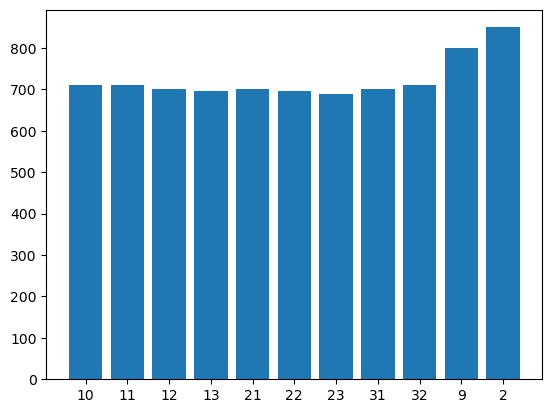

In [71]:
plt.bar(nodes_df["Node IDS"],nodes_df["Elevations"])

In [72]:
link_ids=d.getLinkNameID()
link_length=d.getLinkLength()
link_diameters=d.getLinkDiameter()
link_flows=d.getLinkFlows()
link_headloss=d.getLinkHeadloss()

In [73]:
link_ids

['10',
 '11',
 '12',
 '21',
 '22',
 '31',
 '110',
 '111',
 '112',
 '113',
 '121',
 '122',
 '9']

In [74]:
for i in range(len(link_ids)):
    links_data.append({
        'Link IDS':link_ids[i],
        'Length':link_length[i],
        'Diameter':link_diameters[i],
        'Flow':link_flows[i],
        'Headloss':link_headloss[i]
    })

In [75]:
links_df=pd.DataFrame(links_data)

In [77]:
links_df

,Link IDS,Length,Diameter,Flow,Headloss
0,10,10530.0,18.0,0.0,0.0
1,11,5280.0,14.0,0.0,0.0
2,12,5280.0,10.0,0.0,0.0
3,21,5280.0,10.0,0.0,0.0
4,22,5280.0,12.0,0.0,0.0
5,31,5280.0,6.0,0.0,0.0
6,110,200.0,18.0,0.0,0.0
7,111,5280.0,10.0,0.0,0.0
8,112,5280.0,12.0,0.0,0.0
9,113,5280.0,8.0,0.0,0.0


In [78]:
links_df["Length"].sum()

63530.0

In [79]:
links_df["Diameter"].mean()

10.153846153846153

In [84]:
df=pd.concat([nodes_df,links_df],axis=1)

In [85]:
df

,Node IDS,Elevations,Node Demands,Node Qualities,Link IDS,Length,Diameter,Flow,Headloss
0,10,710.0,0.0,0.0,10,10530.0,18.0,0.0,0.0
1,11,710.0,150.0,0.0,11,5280.0,14.0,0.0,0.0
2,12,700.0,150.0,0.0,12,5280.0,10.0,0.0,0.0
3,13,695.0,100.0,0.0,21,5280.0,10.0,0.0,0.0
4,21,700.0,150.0,0.0,22,5280.0,12.0,0.0,0.0
5,22,695.0,200.0,0.0,31,5280.0,6.0,0.0,0.0
6,23,690.0,150.0,0.0,110,200.0,18.0,0.0,0.0
7,31,700.0,100.0,0.0,111,5280.0,10.0,0.0,0.0
8,32,710.0,100.0,0.0,112,5280.0,12.0,0.0,0.0
9,9,800.0,0.0,0.0,113,5280.0,8.0,0.0,0.0


In [86]:
df.corr()

,Node IDS,Elevations,Node Demands,Node Qualities,Link IDS,Length,Diameter,Flow,Headloss
Node IDS,1.000000,-0.620888,0.510646,NaN,0.249403,-0.304520,0.089595,NaN,NaN
Elevations,-0.620888,1.000000,-0.723863,NaN,0.517698,0.083010,-0.394493,NaN,NaN
Node Demands,0.510646,-0.723863,1.000000,NaN,-0.380761,-0.476891,-0.036187,NaN,NaN
Node Qualities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Link IDS,0.249403,0.517698,-0.380761,NaN,1.000000,-0.149684,-0.007179,NaN,NaN
Length,-0.304520,0.083010,-0.476891,NaN,-0.149684,1.000000,0.361415,NaN,NaN
Diameter,0.089595,-0.394493,-0.036187,NaN,-0.007179,0.361415,1.000000,NaN,NaN
Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headloss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
